In [17]:
import fastplotlib as fpl
import os
import sys
import masknmf
import tifffile
import matplotlib.pyplot as plt
%load_ext autoreload
%matplotlib inline

In [3]:
data = tifffile.imread("/path/to/data.tiff")

# Define a rigid motion correction strategy. Optionally provide a template as a 2D torch.Tensor

In [4]:
max_rigid_shifts = [3, 3]
template = None
rigid_strategy = masknmf.RigidMotionCorrection(max_rigid_shifts, template = template)

# If template is not provided, run the general template update procedure below

In [18]:
rigid_strategy = masknmf.compute_template(data,
                                          rigid_strategy, 
                                          device = "cpu")

# Define a motion correction array, which lazily loads motion corrected frames aligned via the registation_strategy

In [6]:
moco_results = masknmf.RegistrationArray(data,
                                         rigid_strategy,
                                         device = "cpu")

# How to access shifts (and corresponding motion corrected frames). 

In [25]:
frames_to_access = slice(0, 1000)

#moco_shifts is a (num_frames, 2) array. moco_shifts[:, 0] gives you vertical shifts, moco_shifts[:, 1] gives you horizontal shifts.
moco_stack, moco_shifts = [i.cpu().numpy() for i in moco_results.index_frames_tensor(frames_to_access)]

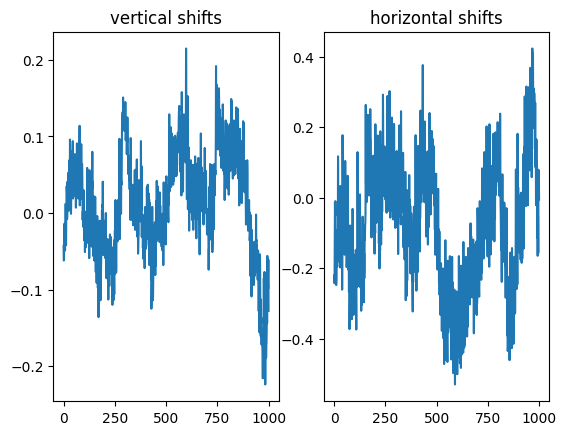

In [23]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(moco_shifts[:, 0])
ax[0].set_title("vertical shifts")
ax[1].plot(moco_shifts[:, 1])
ax[1].set_title("horizontal shifts")
plt.show()

# Visualize the raw vs. registered data via fastplotlib

In [27]:
iw = fpl.ImageWidget(data = [data[frames_to_access], moco_stack, rigid_strategy.template.cpu().numpy()],
                    names = ['raw', 'motion corrected', 'template'],
                    figure_shape = (1, 3))
iw.cmap = "gray"
iw.show()